305197.8800000039
1.0
290020.41999993875
0.9875
165022.23999997764
0.08125000000000004
161802.10000001482
0.012499999999999956
315230.9600000239
0.975
163041.81999998327
0.025000000000000022
305434.27999999013
0.95625
315405.0600000277
0.9875
160966.88000004046
0.0


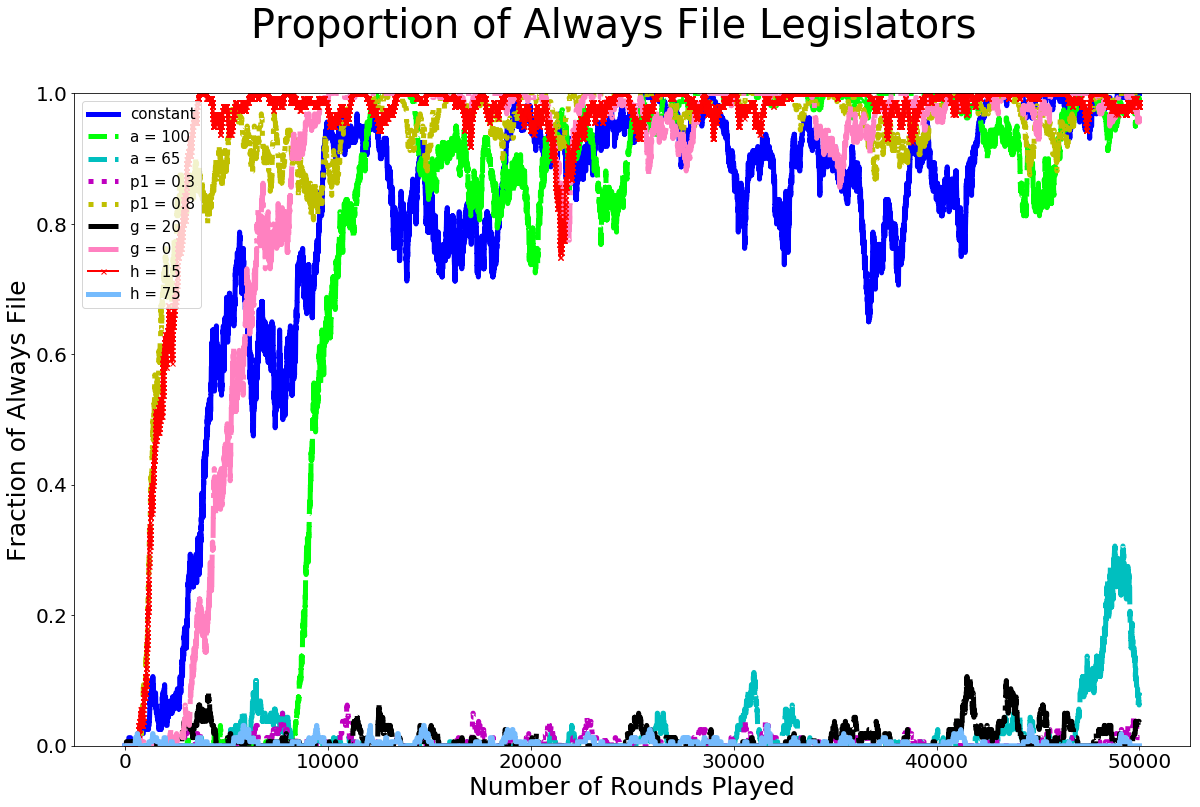

In [2]:
# Start with Always Don't Allow, Always Cooperate

import random
import matplotlib.pyplot as plt
import numpy
import pylab


%matplotlib inline

#Initialize a dictionary
d = {nodes: [] for nodes in range(160)}

#Define parameters

# p1 is the probability of passing the bill with the attached amendment
p1 = 0.5

# p2 is the probability of passing the bill without the attached amendment (p2 > p1)
p2 = 0.6

# a is the Representative's payoff for passing the bill with the amendment (a > 0)
a = 80

# g is the punishment the Representative receives for disobeying the Speaker (g > 0)
g = 10

# h is the reward the Representative receives for obeying the Speaker (h > 0)
h = 25

# i is the Speaker's payoff for passing the bill with no amendment (i > 0)
i = 2

# b is the Speaker's payoff for passing the amendment (b > 0)
b = 2

# f is the Speaker's loss of power due to the Representative disobeying (f > 0)
f = 2

#Initialize a new list that keeps track of the fraction of Representatives playing Always Cooperate
repfraction = []

#Initialize a new list that keeps track of the Always File, Always Allow payoffs
afaa = {nodes: 1 for nodes in range(160)}

#Initialize a new list that keeps track of the Always File, Always Allow payoff fraction
afaafraction = []

#Define a function that gives the time series for the fraction of cooperators
def evolve(d, p1, p2, a, g, h, i, b, f):

    #Initialize a list that keeps track of the Payoff to Society (If amendment filed, then payoff = 0.04, if amendment not filed, then payoff = 0.02)
    socialpayoff = {nodes: 0 for nodes in range(160)}
    
    #Initialize a list used to reach the socialpayoff number
    sumsumsocialpayoff = []
    
    #Define the Representatives' strategies (1 = Always Cooperate, 0 = Always File)
    repstrat = {nodes: 1 for nodes in range(160)}

    #Define the Speaker's strategy (1 = Always Allow, 0 = Always Don't Allow)
    speakerstrat = {nodes: 0 for nodes in range(1)}
    
    #Run this algorithm 3 * 10^5 times
    for i in range(50000):

        #Initialize another dictionary that holds payoffs
        payoff = {nodes: [] for nodes in range(160)}
        
        #Record the fraction of Representatives playing Always Cooperate
        repfraction.append(1 - sum(repstrat.values()) / 160.0)
        
        #The Speaker plays a mixed strategy to maximize his payoff: The Speaker wants to play Always Not Allow against Always Cooperate, and Always Allow against Always File
        c = random.random()
        if c >= repfraction[i]:
            speakerstrat[0] = 0
        else:
            speakerstrat[0] = 1
        
        #Each individual plays one round of the Speaker Game, and then has their fitness stored in the fitness dictionary
        for x in d:
            if repstrat[x] == 1:
                if speakerstrat[0] == 1:
                    payoff[x].append(a * p1)
                elif speakerstrat[0] == 0:
                    payoff[x].append(h)        
            elif repstrat[x] == 0:
                if speakerstrat[0] == 1:
                    payoff[x].append(a * p1)
                elif speakerstrat[0] == 0:
                    payoff[x].append((a * p1) - g) 

        #Initialize a new dictionary that keeps track of the fitness of Representatives
        fitness = {nodes: sum(payoff[nodes]) for nodes in range(160)}

        #Normalize the fitness
        probability = []
        for x in fitness:
            probability.append(fitness[x] / sum(fitness.values()))

        # One Representative is randomly chosen to "die" (lose an election, retire, resign, etc.)
        death = numpy.random.choice(list(range(0,160)))

        # A Representative is chosen to replace the "dead" Representative with strategy proportional to the strategy distribution of the Representatives
        replacement = numpy.random.choice(list(range(0,160)),p=probability)

        # The chosen Representative's strategy is used by the replacing Representative
        repstrat[death] = repstrat[replacement]

        # Each individual has their strategy mutate with probability u
        for x in repstrat:
            u = random.random()
            if u <= 10**-5:
                if repstrat[x] == 0:
                    repstrat[x] = 1
                elif repstrat[x] == 1:
                    repstrat[x] = 0
                
        # Record how many Always File, Always Allow payoffs there are 
        for x in fitness:
            if fitness[x] == a * p1:
                afaa[x] = 1
            elif fitness[x] != a * p1:
                afaa[x] = 0
                
        # Record the fraction 
        afaafraction.append((sum(afaa.values())) / 160.0)
     
        # Record the payoff to society
        for x in fitness:
            if fitness[x] == h:
                socialpayoff[x] = 0.02
            elif fitness[x] == (a * p1) - g:
                socialpayoff[x] = 0.04
            elif fitness[x] == a * p1:
                socialpayoff[x] = 0.04  

        #Sum social payoffs
        sumsocialpayoff = sum(socialpayoff.values())
        sumsumsocialpayoff.append(sumsocialpayoff)
    socialpayoff = sum(sumsumsocialpayoff)
    print(socialpayoff)


fig, ax = plt.subplots()
X = numpy.linspace(0,50000,50000)
fig.set_size_inches(20, 12)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
fig.suptitle('Proportion of Always File Legislators', fontsize=40)

evolve(d,p1,p2,a,g,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-b', label='constant', linewidth=5.0)

repfraction = []
evolve(d,p1,p2,100,g,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, 'xkcd:bright green', linestyle='--', label='a = 100', linewidth=5.0)

repfraction = []
evolve(d,p1,p2,65,g,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-c', linestyle='--', label='a = 65', linewidth=5.0)

repfraction = []
evolve(d,0.3,p2,a,g,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-m', linestyle=':', label='p1 = 0.3', linewidth=5.0)

repfraction = []
evolve(d,0.8,p2,a,g,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-y', linestyle=':', label='p1 = 0.8', linewidth=5.0)

repfraction = []
evolve(d,p1,p2,a,20,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-k', linestyle='-.', label='g = 20', linewidth=5.0)

repfraction = []
evolve(d,p1,p2,a,0,h,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, 'xkcd:pink', linestyle='-.', label='g = 0', linewidth=5.0)

repfraction = []
evolve(d,p1,p2,a,g,15,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, '-rx', label='h = 15', markersize=5, linewidth=2.0)

repfraction = []
evolve(d,p1,p2,a,g,75,i,b,f)
print(repfraction[49999])
ax.plot(X,repfraction, 'xkcd:sky blue', label='h = 75', linewidth=5.0)

plt.ylabel('Fraction of Always File', size=25)
plt.xlabel('Number of Rounds Played', size=25)
pylab.legend(loc='upper left', prop={'size': 15})
pylab.ylim(0, 1.0)
pylab.show()
plt.show()